# Section 1: Business Understanding
The COVID-19 dataset provides information on the impact of the pandemic on different countries and regions around the world. The data includes various metrics related to the spread and impact of the virus, such as the number of confirmed cases, deaths, and recoveries. The dataset can be used to analyze the impact of COVID-19 on different countries and regions, identify affected continents, and gain insights into the spread and impact of the pandemic.

The questions asked :
1. What does your country tell about your Covid recovery?
2. What does every continent tell about recovery?
3. Is the death rate determined by to Region?
4. Are there countries free from covid?
5. What continents still affected?

In [187]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import RocCurveDisplay

# Supervised model used
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix,accuracy_score

%matplotlib inline

# Section 2: Data Understanding

**Gather Data**
Working on the covid19 country wise dataset

In [165]:
df = pd.read_csv("/kaggle/input/corona-virus-report/country_wise_latest.csv")

In [166]:
#columns in the dataset
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [167]:
# number of rows and columns
df.shape

(187, 15)

In [168]:
# first lets rename the 'Country/Region' column to a more appropriate name
df.rename(columns = {'Country/Region':'country'}, inplace = True)

# 1. What does your country tell about your Covid recovery?

Now to look at our first question of interest: What is the mean of the people recovered per county, I'll use the recovery column and get their mean by country,


In [169]:
# Dictionary of the countries with the corresponding mean of the Recovered cases

df.groupby(['country']).mean()['Recovered'].sort_values().dropna().to_dict()

/tmp/ipykernel_32/2351913951.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['country']).mean()['Recovered'].sort_values().dropna().to_dict()


{'Canada': 0.0,
 'Syria': 0.0,
 'Serbia': 0.0,
 'Sweden': 0.0,
 'Mozambique': 0.0,
 'Timor-Leste': 0.0,
 'Western Sahara': 8.0,
 'Papua New Guinea': 11.0,
 'Holy See': 12.0,
 'Greenland': 13.0,
 'Saint Kitts and Nevis': 15.0,
 'Fiji': 18.0,
 'Dominica': 18.0,
 'Laos': 19.0,
 'Saint Lucia': 22.0,
 'Grenada': 23.0,
 'Belize': 26.0,
 'Seychelles': 39.0,
 'Saint Vincent and the Grenadines': 39.0,
 'Botswana': 63.0,
 'Antigua and Barbuda': 65.0,
 'Gambia': 66.0,
 'Liechtenstein': 81.0,
 'Bhutan': 86.0,
 'Bahamas': 91.0,
 'Barbados': 94.0,
 'Namibia': 101.0,
 'Monaco': 104.0,
 'Trinidad and Tobago': 128.0,
 'Lesotho': 128.0,
 'Brunei': 138.0,
 'Cambodia': 147.0,
 'Guyana': 181.0,
 'Tanzania': 183.0,
 'Netherlands': 189.0,
 'Eritrea': 191.0,
 'Mongolia': 222.0,
 'Angola': 242.0,
 'Burma': 292.0,
 'Burundi': 301.0,
 'Comoros': 328.0,
 'Mauritius': 332.0,
 'Vietnam': 365.0,
 'Taiwan*': 440.0,
 'Zimbabwe': 542.0,
 'Libya': 577.0,
 'Togo': 607.0,
 'Liberia': 646.0,
 'San Marino': 657.0,
 'Malta':

pie chart to plot the percent of every country's recovery

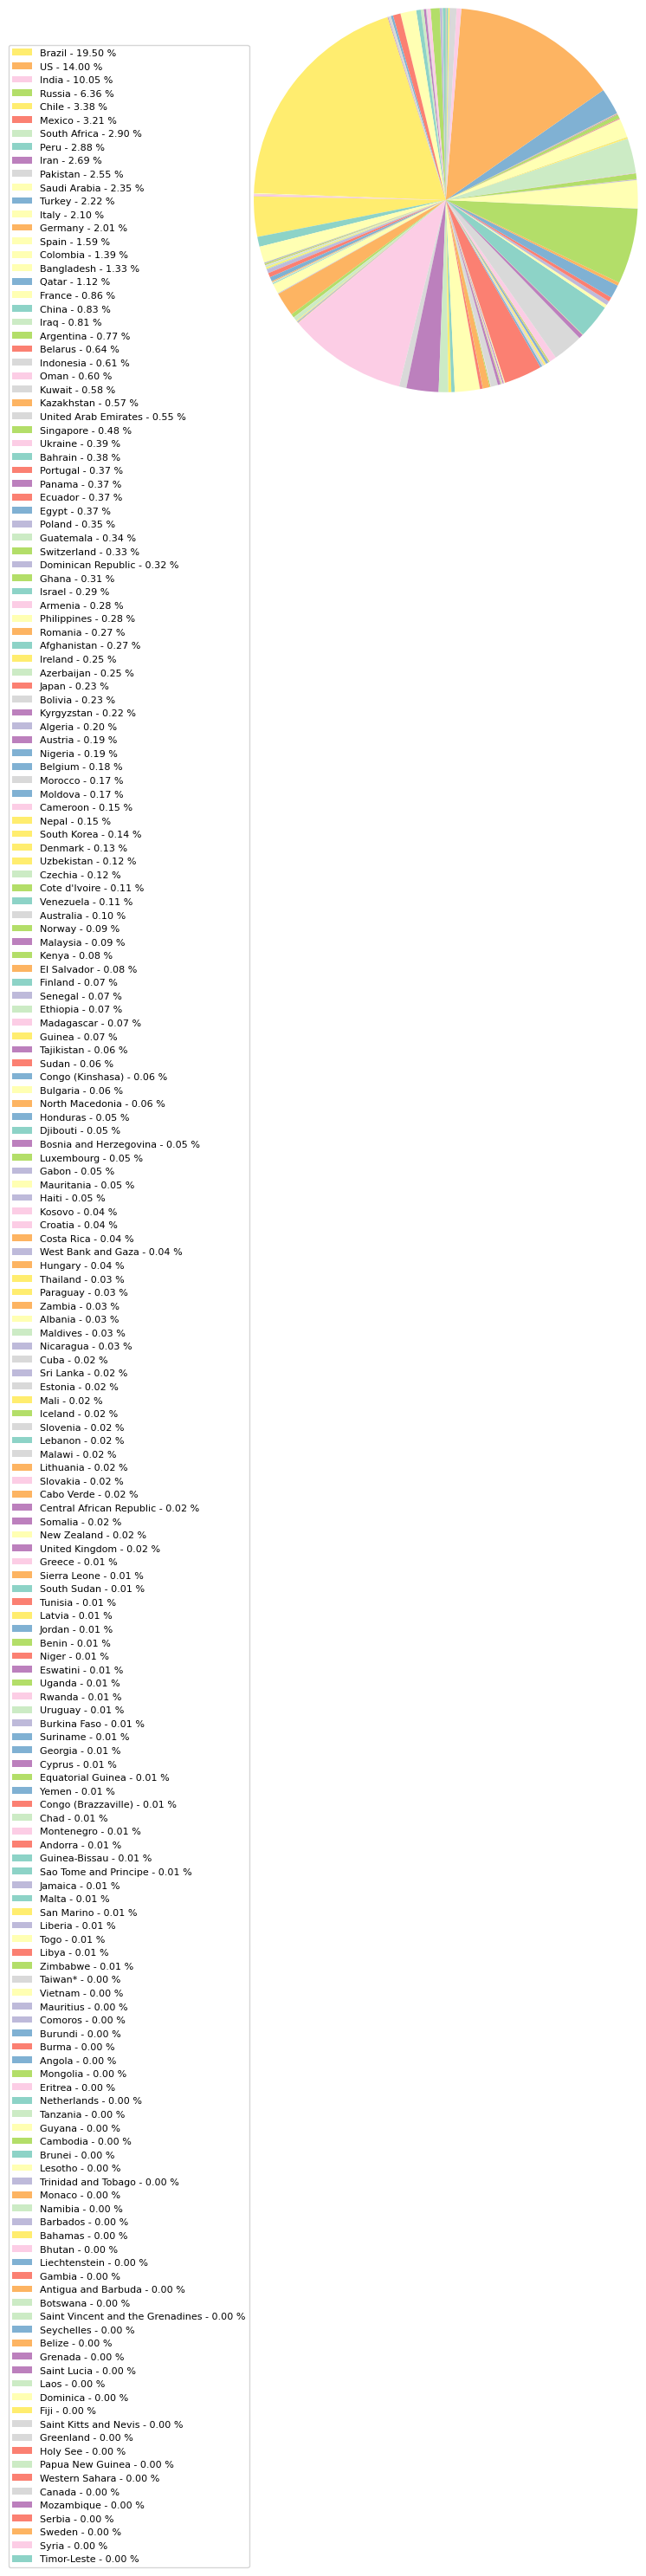

In [170]:
# Get the 'country' and 'Recovered' columns from the dataframe as x and y series
x = df['country']
y = df['Recovered']

# Calculate percentage of recovered cases for each country
percent = (100 * y) / y.sum()

# Choose a color palette for the pie chart
colors = sns.color_palette("Set3")

# Create a pie chart with labels for each country's name and percentage of recovered cases
# The startangle argument sets the angle at which the first wedge starts
# The radius argument sets the radius of the pie chart
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.5)

# Create labels for each wedge, consisting of the country name and percentage of recovered cases
labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(x, percent)]

# Sort the legend by the size of the wedges (number of recovered cases)
sort_legend = True
if sort_legend:
    patches, labels, dummy = zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

# Add a legend to the chart, with labels aligned to the right of the chart
plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.), fontsize=8)

# Show the plot
plt.show()

> we tell that the top 4 countries in terms of more recovery are Brazil 19.5% , US 14% , India 10.05% and Russia 6.36%

# 2. What does every continent tell about recovery?
we've seen the recovery based on each country let's see the recovery based on continents

In [171]:
# Dictionary of the WHO Region with the corresponding mean of the Recovered cases
df.groupby(['WHO Region']).mean()['Recovered'].sort_values().dropna().to_dict()

/tmp/ipykernel_32/2628070566.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['WHO Region']).mean()['Recovered'].sort_values().dropna().to_dict()


{'Africa': 9180.104166666666,
 'Western Pacific': 12923.125,
 'Europe': 35602.19642857143,
 'Eastern Mediterranean': 54609.09090909091,
 'South-East Asia': 115693.3,
 'Americas': 127674.74285714286}

In [172]:
# lets create a dictionary with the continents and their recovery mean 
continent_recovery_rate = { 
    "continent" : ["Africa","Western Pacific","Europe","Eastern Mediterranean","South-East Asia","Americas"],
    "Recovery_rate" : [9180.104167,12923.125000, 35602.196429,54609.090909, 115693.300000, 127674.742857]
}
# transform it into pandas dataframe
data = pd.DataFrame(continent_recovery_rate)

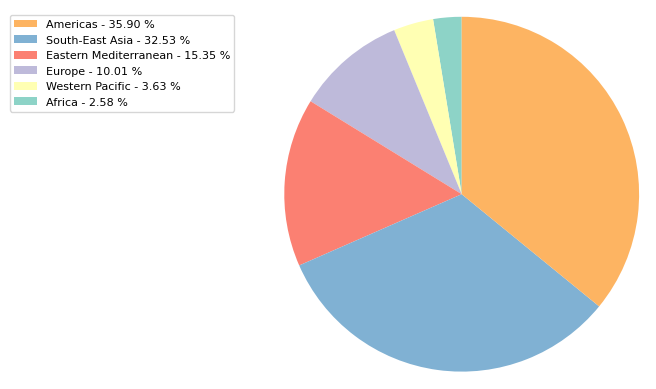

In [173]:
# pie chart that shows the percent of every countries recovery

x = data['continent']
y = data['Recovery_rate']
percent = (100*y)/y.sum()

colors=sns.color_palette("Set3")

patches, texts = plt.pie(y,colors=colors,startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),key=lambda x: x[2],reverse=True))

plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),fontsize=8)


plt.show() 

> In terms of continents, the Americas and South East Asia had the best recovery rate.
which was expected since Brazil and US (the americas)
ranked first in terms of countries followed by India and Russia (Asia)

# 3. Is the death rate determined by to Region?

In [174]:
continent_death_rate = { 
    "continent" : ["Africa","Western Pacific","Europe","Eastern Mediterranean","South-East Asia","Americas"],
    "death_rate" : [2.306458,1.29, 4.198393,3.563182, 1.296, 3.052571]
}
data2 = pd.DataFrame(continent_death_rate)

In [175]:
df.groupby(['WHO Region']).mean()['Deaths / 100 Cases'].sort_values().dropna()

/tmp/ipykernel_32/3741741684.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['WHO Region']).mean()['Deaths / 100 Cases'].sort_values().dropna()


WHO Region
Western Pacific          1.290000
South-East Asia          1.296000
Africa                   2.306458
Americas                 3.052571
Eastern Mediterranean    3.563182
Europe                   4.198393
Name: Deaths / 100 Cases, dtype: float64

<Axes: xlabel='continent'>

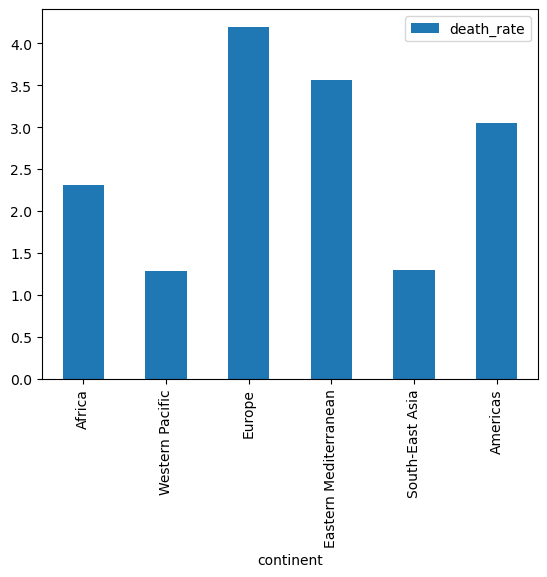

In [176]:
data2.plot(x='continent',y='death_rate',kind='bar')

> well thats quite surprising because the americase ranked best in Recovery, it is  possible that the death toll in these countries was higher, leaving fewer confirmed cases to recover.
also that could mean that these countries did better in handling the cases which could indicate better health care,
Europe certainly surprised me considering it ranked 1st in terms of healthcare by WHO

# 4. Are there countries free from covid?

In [177]:
no_more_covid = df[df['Active']==0]
no_more_covid = no_more_covid.sort_values('Confirmed')
no_more_covid.reset_index(drop=True)

,country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Holy See,12,0,12,0,0,0,0,0.00,100.00,0.00,12,0,0.0,Europe
1,Dominica,18,0,18,0,0,0,0,0.00,100.00,0.00,18,0,0.0,Americas
2,Grenada,23,0,23,0,0,0,0,0.00,100.00,0.00,23,0,0.0,Americas
3,Brunei,141,3,138,0,0,0,0,2.13,97.87,2.17,141,0,0.0,Western Pacific
4,San Marino,699,42,657,0,0,0,0,6.01,93.99,6.39,699,0,0.0,Europe


In [178]:
no_more_covid[['country','WHO Region']]

,country,WHO Region
75,Holy See,Europe
49,Dominica,Americas
69,Grenada,Americas
24,Brunei,Western Pacific
143,San Marino,Europe


we can tell that countries with no longer active cases exist in the Americas and Europe region
- Again we see the Americas in better recovery and no more active cases it could mean that the healthcare systems in these countries have been successful in treating COVID-19 patients

In [179]:
# df

In [180]:
# group by every column by their WHO region
temp = df.groupby(["WHO Region"]).mean()

/tmp/ipykernel_32/1294973998.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = df.groupby(["WHO Region"]).mean()


In [181]:
temp

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
WHO Region,,,,,,,,,,,,,
Africa,15066.812500,254.645833,9180.104167,5632.062500,253.666667,7.354167,303.395833,2.306458,57.014792,NaN,12669.166667,2397.645833,18.086458
Americas,252551.028571,9792.342857,127674.742857,115083.942857,3700.885714,101.571429,2707.885714,3.052571,62.291429,NaN,223291.371429,29259.657143,16.331143
Eastern Mediterranean,67761.090909,1742.681818,54609.090909,11409.318182,564.090909,20.227273,674.681818,3.563182,66.593182,NaN,63583.954545,4177.136364,10.482273
Europe,58920.053571,3770.428571,35602.196429,19547.428571,398.107143,5.428571,209.500000,4.198393,68.635000,NaN,56193.142857,2726.910714,7.769643
South-East Asia,183529.700000,4134.900000,115693.300000,63701.500000,4899.300000,73.400000,3758.200000,1.296000,66.704000,1.9560,147828.300000,35701.400000,8.513000
Western Pacific,18276.750000,515.562500,12923.125000,4838.062500,205.562500,1.500000,70.437500,1.290000,76.805000,1.7875,16647.437500,1629.312500,22.111250


>To check wether if our first assumption is correct that the americas death toll was higher which affected their rankings,
we will get the percent of the deaths relative to all the confirmed cases 
also the population could be a playing factor for why it ranked high in the deaths than other countries with less population

In [182]:
temp[['Confirmed','Deaths']]

,Confirmed,Deaths
WHO Region,,
Africa,15066.812500,254.645833
Americas,252551.028571,9792.342857
Eastern Mediterranean,67761.090909,1742.681818
Europe,58920.053571,3770.428571
South-East Asia,183529.700000,4134.900000
Western Pacific,18276.750000,515.562500


In [183]:
temp['percent'] = (temp['Deaths']/temp['Confirmed'])*100
temp[['Confirmed','Deaths','percent']]

,Confirmed,Deaths,percent
WHO Region,,,
Africa,15066.812500,254.645833,1.690111
Americas,252551.028571,9792.342857,3.877372
Eastern Mediterranean,67761.090909,1742.681818,2.571803
Europe,58920.053571,3770.428571,6.399228
South-East Asia,183529.700000,4134.900000,2.252987
Western Pacific,18276.750000,515.562500,2.820865


Europe percent was the worst which makes sense since they ranked the highest in deaths rate as for
The Americas percent was pretty average 
that could mean that our second assumption was probably more accurate that they have better healthcare as they ranked on top in :
1. Recovery 
2. No more active
3. And held an average percent in the Deaths percent relative to the confirmed cases

**Is there a correlation between the number of confirmed COVID-19 cases and deaths?**

In [184]:
# We can see covid really 
df['Confirmed'].corr(df['Deaths'])

0.9346984343393534

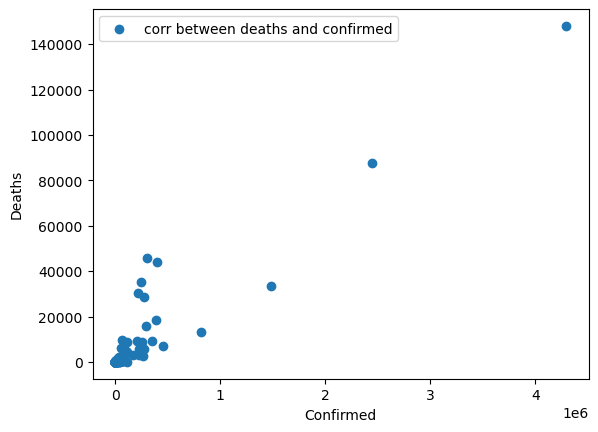

In [185]:
plt.scatter(df['Confirmed'],df['Deaths'],label ='corr between deaths and confirmed')
# Add a legend and axis labels
plt.legend()
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.show()

> Upon closer examination of the data, it would seem that there is weak relationship between the number of COVID-19 confirmed cases and the number of disease-related fatalities. Although the correlation coefficient gives a sense of the relationship's strength and direction, it's critical to remember that correlation does not indicate causality. Additional research is required to ascertain the degree to which one variable influences the other, as there may be additional variables that contribute to both confirmed cases and deaths. Nevertheless, the strong link between confirmed and deaths  cases emphasises the significance of ongoing initiatives to stop the spread of COVID-19 and provide sufficient healthcare for individuals who are afflicted.

# 5. What continents still affected?

> I want to see at which continents is covid still active, I'use the confirmed last week which shows the number of cases confirmed last week relative to each continent

In [143]:
df.groupby(['WHO Region']).mean()['Confirmed last week'].sort_values().dropna()

/tmp/ipykernel_32/2152063144.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['WHO Region']).mean()['Confirmed last week'].sort_values().dropna()


WHO Region
Africa                    12669.166667
Western Pacific           16647.437500
Europe                    56193.142857
Eastern Mediterranean     63583.954545
South-East Asia          147828.300000
Americas                 223291.371429
Name: Confirmed last week, dtype: float64

In [144]:
continent_infection_rate = { 
    "continent":["Africa","Western Pacific","Europe","Eastern Mediterranean","South-East Asia","Americas"],
    "infection_rate":[12669.166667,16647.437500,56193.142857, 63583.954545,147828.3,223291.371429]
}
data3 = pd.DataFrame(continent_infection_rate)
# Americas are of highest recovery followed by South-East Asia

<Axes: xlabel='continent'>

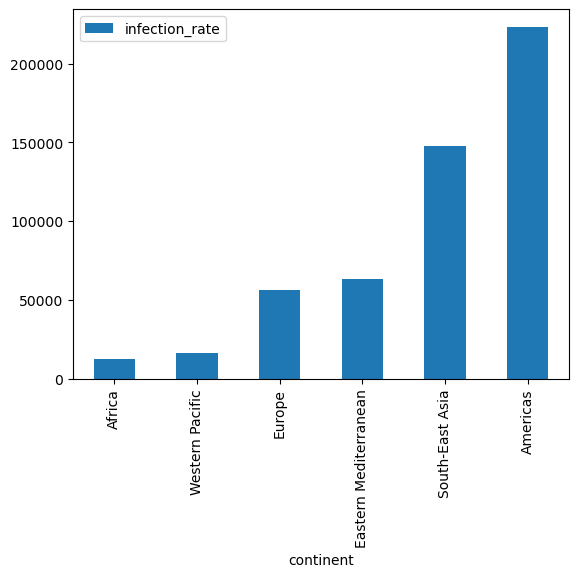

In [145]:
data3.plot(x ='continent',y='infection_rate',kind='bar')

> Good news for europe the virus is no longer highly active 
meanwhile the americas ranked on top but if our assumption is correct that they have better health care systems that mean they can handle it, but we also put in consideration the population

# Get prominent factors affecting deaths

> from what we saw from the corr between deaths and the confirmed cases we can check what factors can more determine and better predict the deaths for each continent and their relation, so that we can build our model better,
first one in our top factors is the numbers of confirmed but as I highlighted that's not enough

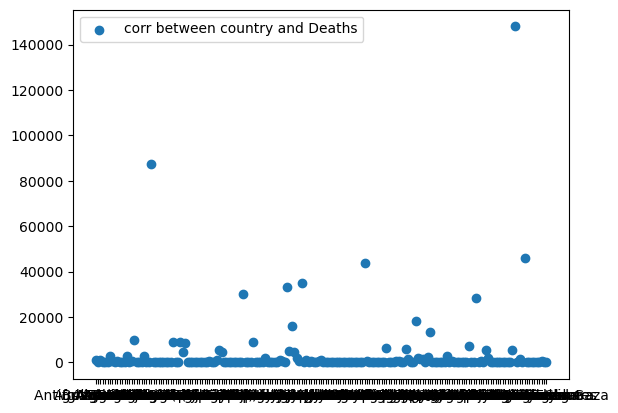

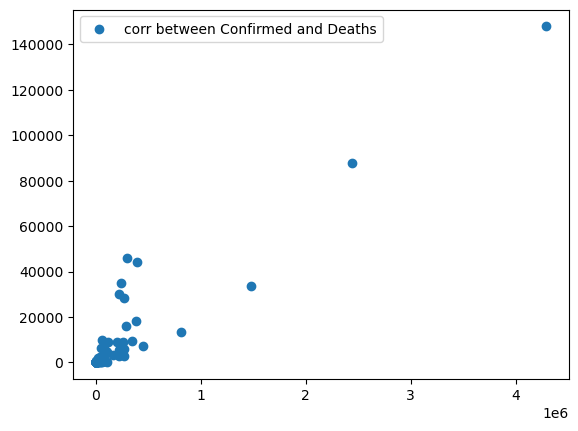

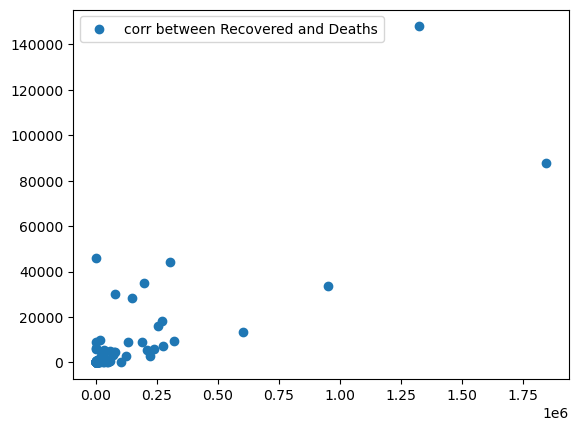

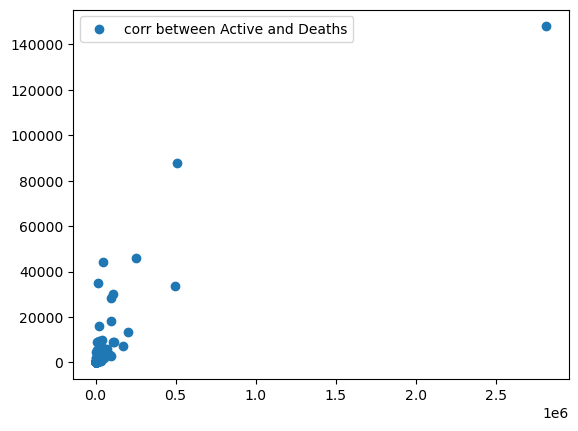

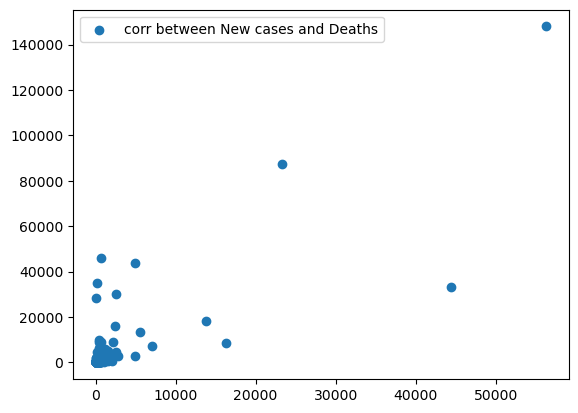

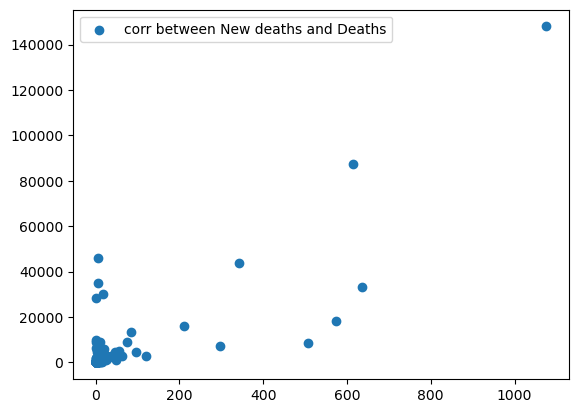

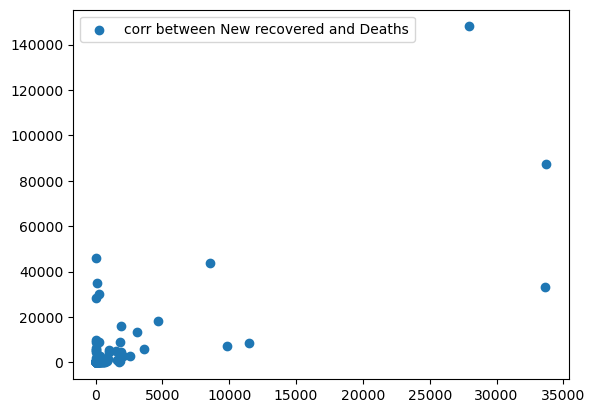

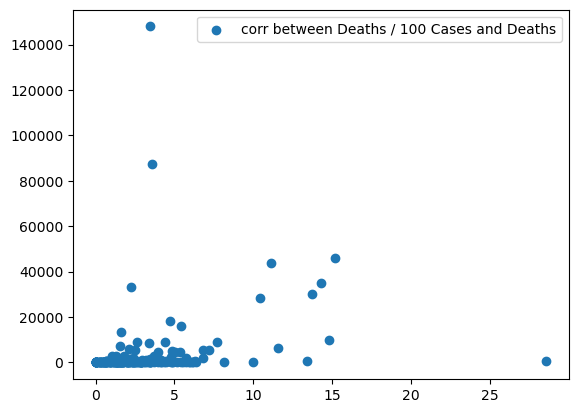

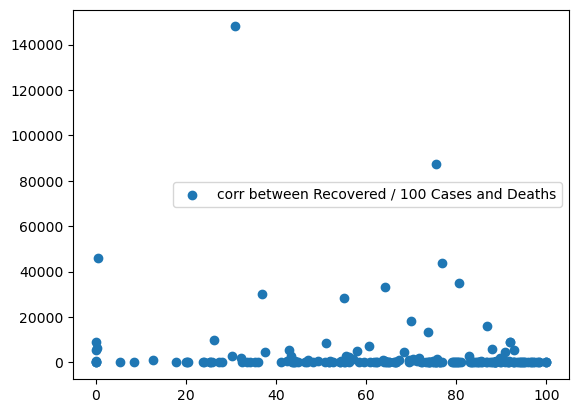

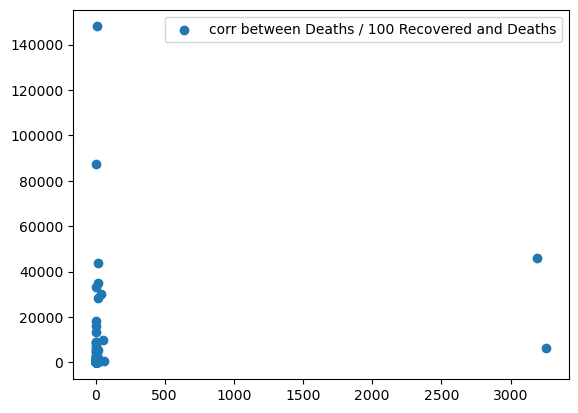

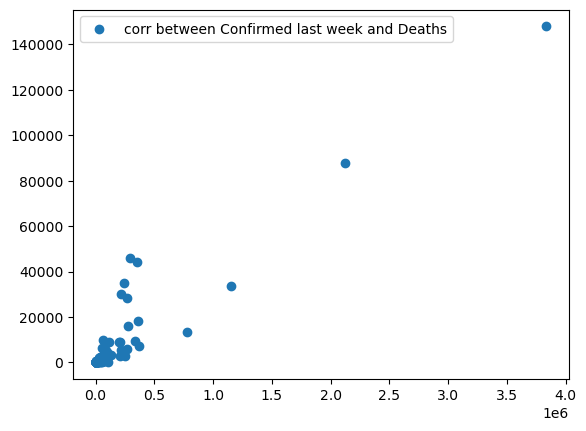

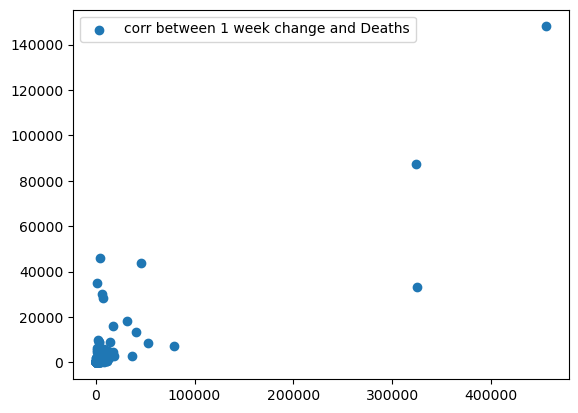

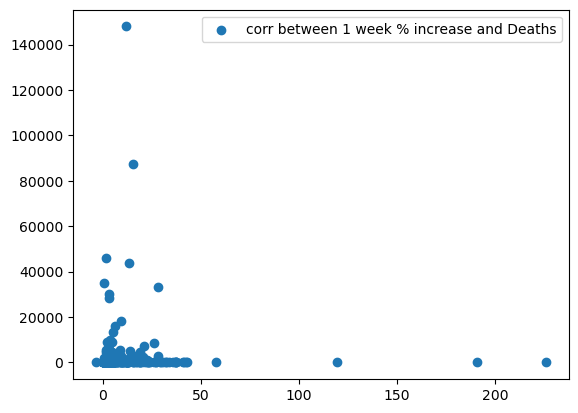

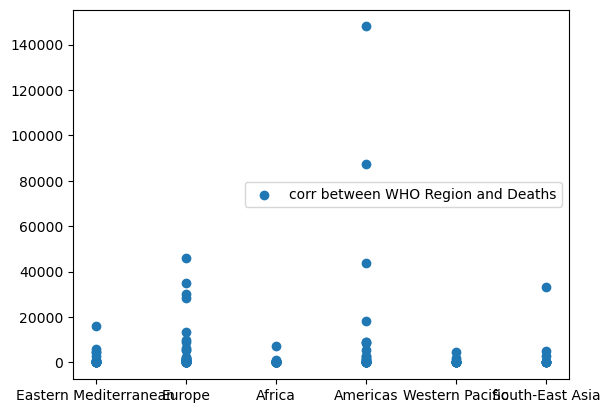

In [146]:
# will use lambda 
columns_list = df.columns.to_list()
columns_list.remove('Deaths')

for col in columns_list:
    plt.scatter(df[col],df['Deaths'],label =('corr between {} and Deaths').format(col))
    plt.legend()
    plt.show()

> we can see that all of them are postively related to the deaths rate except:
1. 1 week % increase
2. Deaths / 100 Recovered
I'll drop them from my model the others could help in better indicating the deaths rate that's why I'll be using them in my model

# Section 3: Data preparation

In [190]:
# 1st check for nulls
df.isnull().sum().sum()

0

Good now that we have no nulls we can move on to our next step which is,
using label encoder to handle categorical data by encoding them

In [147]:
df = df.apply(LabelEncoder().fit_transform)

> Used standard scaler to scale data to prevent any bias

In [148]:
scaler = StandardScaler()
scaler.fit_transform(df)
df = pd.DataFrame(df)

In [99]:
df.head(2)

,country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,0,133,109,133,127,44,10,13,96,83,96,134,78,22,2
1,1,89,66,83,83,46,6,27,83,58,98,85,77,122,3


# Section 4: Modeling
Will use KNN to predict the deaths

> From what we learnt from the plots above that ['country','Recovered / 100 Cases','Deaths / 100 Recovered','Deaths / 100 Cases','Recovered / 100 Cases','1 week % increase'] doesn't really affect the deaths rate so I will not be using them

In [152]:
# split into label and data
X = df.drop(['Deaths','country','Recovered / 100 Cases','Deaths / 100 Recovered','Deaths / 100 Cases','Recovered / 100 Cases','1 week % increase'],axis=1)
y = df['Deaths']

# split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# intanstiate the model
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
# scores
print('The r-squared score for the model was',"{:,.2f}".format(r2_score(y_test,y_pred)))
print('accuracy of model is',"{:,.2f}".format(accuracy_score(y_test,y_pred)*100),'%')

The r-squared score for the model was 0.64
accuracy of model is 12.28 %


> The accuracy is quite low which is very much expected because there may be other factors that contribute to the deaths rate, such as population density, age distribution, healthcare resources, public health policies,etc.

# Visualize model's performance

**we need to visualize how the model works, I'll use a scatter plot to get relation between true labels and predicted ones** 

In [162]:
def get_scatter_performance(test, pred):
    '''
    Creates a scatter plot to visualize the performance of a machine learning model
    
    Input:  
        test: The true labels of the test data.
        pred: The predicted labels generated by the model.
    
    Output: Scatter plot with the true labels on the x-axis and the predicted
            labels on the y-axis.
    '''
    plt.scatter(test, pred)
    plt.xlabel('True labels')
    plt.ylabel('Predicted labels')
    plt.title('KNN model performance')
    plt.show()

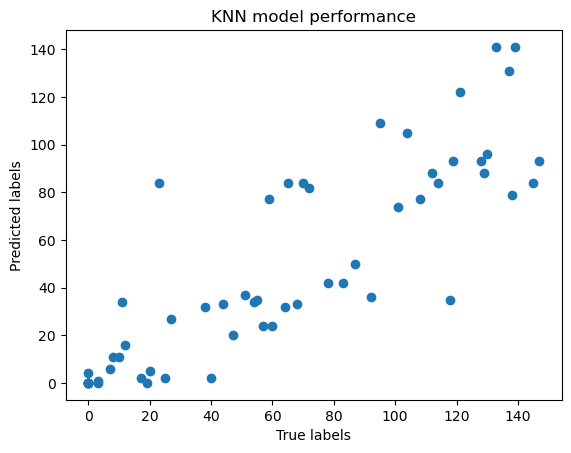

In [163]:
get_scatter_performance(y_test, y_pred)

The model has preformed well but it would've preformed better if the data that truly affects covid is provided as I mentioned before

# Blog post on medium to share my findings

In [102]:
# https://medium.com/@shereenwalid2003/the-hardest-hit-countries-by-covid-19-analysis-that-will-make-you-reflect-on-the-importance-of-cb12d4953da3